## Notebook 8: Noções básicas de Pandas para análise de dados
Neste Notebook, vamos aprender a realizar análises básicas de dados com o pacote `pandas`.

In [1]:
# Provavelmente, vamos precisar do seguinte
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Carregar dados reais com o Pandas
Os dados reais são frequentemente guardados em ficheiros CSV (Comma Separated Values – em português, valores separados por vírgulas – embora estes valores possam ser separados por outras coisas que não vírgulas).
Até agora, carregámos ficheiros CSV com o comando `np.loadtxt` e `np.genfromtxt`.
A função `loadtxt` tem algumas funcionalidades básicas e funciona bem, mas, para conjuntos de dados mais elaborados, vamos precisar de funcionalidades mais sofisticadas.
O pacote mais avançado e capaz para gerir e analisar dados designa-se `pandas`. Aqui, vamos usar apenas algumas das funções do pacote `pandas`. Pode encontrar informações completas sobre o pacote `pandas` no respetivo [website](http://pandas.pydata.org/).

Considere o seguinte conjunto de dados, armazenado no ficheiro `transport.csv`. Apresenta a percentagem de quilómetros de transporte por carro (car), autocarro (bus) ou ferrovia (rail) em quatro países. O conjunto de dados tem quatro colunas.

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

Este ficheiro de dados pode ser carregado com a função `read_csv` do pacote `pandas`. A função `read_csv` tem muitas opções. Vamos usar três delas. As linhas a ignorar estão identificadas pela palavra-chave `skiprows` (neste caso, a linha 1 com o texto `yada yada`). A palavra-passe `skipinitialspace` está definida como `True` para que a coluna com o nome 'car' seja carregada sem o espaço inicial presente no ficheiro de dados. Já a palavra-passe `index_col` está definida para indicar que os nomes na coluna 0 podem ser usados como um índice para selecionar uma linha.

In [2]:
from pandas import read_csv
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

O pacote `pandas` carrega dados para um `DataFrame`. Um `DataFrame` é como um array, mas tem muitas caraterísticas adicionais para análise de dados. Para começar, assim que carregar os dados, pode apresentá-los no ecrã.

In [3]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


Quando o DataFrame é grande, pode, ainda assim, apresentá-lo no ecrã (o `pandas` é inteligente o suficiente para não apresentar o DataFrame por completo quando for muito grande) ou pode simplesmente apresentar as primeiras cinco linhas do DataFrame com a função `.head()`.

Outra boa opção é poder usar a função `display` do pacote `IPython.display` para apresentar o DataFrame no ecrã. Apenas tem de importar a função `display` para a poder usar no Notebook. 

In [4]:
from IPython.display import display
display(tran)

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


### Manipulação básica de DataFrames
As linhas e colunas de um DataFrame podem ter nomes (como pode ver acima em `tran` `DataFrame`) quando são apresentadas no ecrã. Para descobrir que nomes são usados para as colunas, use a função `keys`, sempre precedida de um ponto. Pode avançar pelos nomes das colunas, se assim pretender.

In [5]:
print('Nome das colunas:')
print(tran.keys())
for key in tran.keys():
    print(key)

Nome das colunas:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


Cada DataFrame pode ser indexado como um array, ao especificar o número da linha e da coluna através da sintaxe `.iloc` (que significa *index location*, isto é, a localização do índice), em que a coluna 0 é a coluna `car` (já que a coluna `country` foi guardada como índice ao ler o ficheiro CSV; mais informações sobre isto mais à frente).

In [6]:
print(tran.iloc[0, 1])  # fornece os dados da coluna 'bus' para França
print(tran.iloc[1, 0])  # fornece os dados da coluna 'car' para a Alemanha
print(tran.iloc[2, 2])  # fornece os dados da coluna 'rail' para os Países Baixos
print(tran.iloc[3])     # todos os dados para o Reino Unido
print(tran.iloc[:, 1])  # # todos os dados para a coluna 'bus'

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Em alternativa, os valores de um DataFrame podem ser selecionados ao especificar os índices pelo nome através da sintaxe `.loc`. Isto é um pouco mais extenso, mas *muito* mais explícito. O equivalente da célula de código acima, mas com os índices por nome, é o seguinte:

In [7]:
print(tran.loc['France', 'bus'])
print(tran.loc['Germany', 'car'])
print(tran.loc['Netherlands', 'rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:, 'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Há duas formas alternativas de aceder a todos os dados numa coluna. Primeiro, pode simplesmente especificar o nome da coluna como um índice, sem ter de usar a sintaxe `.loc`. Segundo, pode utilizar uma função que comece com um ponto, como a sintaxe `.column_name`, em que `column_name` é o nome da coluna. Assim, as três seguintes são equivalentes:

In [8]:
print(tran.loc[:,'car'])  # todas as linhas da coluna 'car'
print(tran['car'])        # coluna 'car'
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


### Funções do pacote `numpy` para DataFrames
Os DataFrames podem ser tratados como arrays, especialmente quando contêm dados. A maioria das funções do pacote `numpy` funciona com DataFrames, mas também é possível aceder aos mesmos com uma função precedida de ponto, como `dataframe_name.function()`. Basta escrever:

`tran.` 

numa célula de código e premir a tecla [tab] para ver todas as funções disponíveis (há várias). Na célula de código abaixo, calculamos o valor máximo do transporte por carro, o país correspondente ao valor máximo do transporte por carro e o valor médio de todos os transportes por carro.

In [9]:
print('percentagem máxima de viagens de carro:', tran.car.max())
print('país com percentagem máxima de viagens de carro:', tran.car.argmax())
print('percentagem média de viagens de carro:', tran.car.mean())
print('todas as viagens de ferrovia acima de 8 percento:')

percentagem máxima de viagens de carro: 88.2
país com percentagem máxima de viagens de carro: United Kingdom
percentagem média de viagens de carro: 86.47500000000001
todas as viagens de ferrovia acima de 8 percento:


Também pode descobrir todos os valores superiores a um valor especificado, tal como com os arrays.

In [10]:
print(tran.rail[tran.rail > 8])

country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


O código acima identificou França e os Países Baixos como os países com mais de 8% de transportes por ferrovia, mas o código devolveu uma série com os nomes dos países e o valor na coluna ´rail´. Se só quiser os nomes dos países, tem de solicitar os valores da coluna do índice:

In [11]:
print(tran.index[tran.rail > 8].values)

['France' 'Netherlands']


### <a name="back1"></a>Exercício 1. Precipitação média anual por país
O ficheiro `annual_precip.csv` contém a precipitação média anual e a superfície terrestre total de todos os países do mundo (bom, há alguns valores em falta); os dados estão disponíveis no website do <a href="http://data.worldbank.org/">banco mundial</a>. Abra o ficheiro de dados para ver o seu aspeto (no Notepad, Textedit, até no Word, se disponível, ou use [File][Open] no menu Jupyter). Carregue os dados com a função `read_csv` do pacote `pandas`, certificando-se de que os nomes dos países podem ser usados para selecionar uma linha. Depois, efetue as seguintes tarefas:

* Apresente as primeiras cinco linhas do DataFrame no ecrã com a função `.head()`.
* Apresente a precipitação média anual para o Panamá e certifique-se de que inclui as unidades.
* Registe a superfície terrestre total dos Países Baixos e certifique-se de que inclui as unidades.
* Registe todos os países com uma precipitação média anual inferior a 200 mm/ano.
* Registe todos os países com uma precipitação média anual superior a 2500 mm/ano. 
* Registe todos os países cuja precipitação média anual tem uma diferença inferior a 50 mm/ano, relativamente à precipitação média anual dos Países Baixos.

<a href="#ex1answer">Soluções do Exercício 1</a>

### Adicionar uma coluna a um DataFrame
Pode adicionar uma coluna a um DataFrame simplesmente ao especificar o nome e os valores da nova coluna através da sintaxe `DataFrame['newcolumn']=something`. Por exemplo, vamos adicionar uma coluna designada `public_transport`, que é a soma das colunas `bus` e `rail`, e depois descobrir o país com a maior percentagem de utilização dos transportes públicos:

In [12]:
tran['public_transport'] = tran.bus + tran.rail
print('País com maior percentagem de transporte público:', tran.public_transport.argmax())

País com maior percentagem de transporte público: Germany


### Representação gráfica de DataFrames
Pode representar graficamente a coluna ou a linha de um DataFrame com funções `matplotlib`, tal como nos Notebooks anteriores, mas o pacote `pandas` também implementou as suas funções de representação gráfica, muito mais cómodas, (baseadas em `matplotlib`, claro). As capacidades de representação gráfica do `pandas` também usa uma função precedida de *ponto*, como `dataframe.plot()`. Todas as colunas podem ser representadas em simultâneo (note que os nomes surgem nos eixos e a legenda é adicionada automaticamente!).

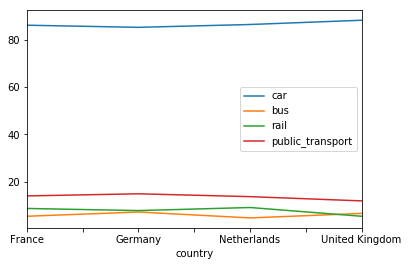

In [13]:
tran.plot();  # representa todas as colunas

Também pode representar graficamente uma coluna de cada vez. O estilo da representação gráfica pode ser especificado pela palavra-chave `kind` (a predefinição é `'line'`). Verifique `tran.plot?` para mais opções.

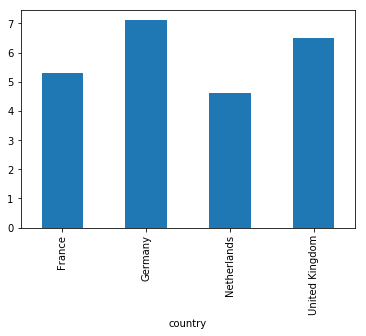

In [14]:
tran['bus'].plot(kind='bar');

### Ordenar DataFrames
Os DataFrames podem ser ordenados com a função `.sort_values`. A palavra-chave `inplace=True` substitui os valores no DataFrame com os novos valores ordenados (quando `inplace=False` é devolvido um novo DataFrame, que pode armazenar numa variável em separado para ter dois conjuntos de dados, um ordenado e um desordenado). A função `sort_values` tem vários argumentos de palavra-chave, incluindo `by`, que pode ser o nome de uma coluna pelo qual pretende ordenar os dados ou uma lista de colunas, para que os dados sejam ordenados pela primeira coluna especificada e para que, quando os valores são iguais, sejam ordenados com base na coluna seguinte na lista. Outra palavra-chave é `ascending`, que pode especificar para ordenar por ordem ascendente (`ascending=True`, que é a predefinição) ou por ordem descendente (`ascending=False`).

In [15]:
print('Dados ordenados pelo uso do carro:')
display(tran.sort_values(by='car'))
print('Dados ordenados pelo uso do bus:')
display(tran.sort_values(by='bus'))

Dados ordenados pelo uso do carro:


,car,bus,rail,public_transport
country,,,,
Germany,85.2,7.1,7.7,14.8
France,86.1,5.3,8.6,13.9
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


Dados ordenados pelo uso do bus:


,car,bus,rail,public_transport
country,,,,
Netherlands,86.4,4.6,9.0,13.6
France,86.1,5.3,8.6,13.9
United Kingdom,88.2,6.5,5.3,11.8
Germany,85.2,7.1,7.7,14.8


### Renomear colunas
Por vezes (com alguma frequência, na verdade), os nomes das colunas num conjunto de dados não são muito convenientes (longos, com espaços, etc.). Para o exemplo dos dados de transporte, as colunas têm nomes convenientes, mas vamos mudá-los por questões de demonstração. Pode renomear as colunas no local e pode alterar quantas quiser. Os nomes novos e os antigos são especificados com um dicionário Python. Um dicionário é um tipo de dados muito útil. É especificado entre chavetas `{}` e associa uma palavra no dicionário a um valor. O valor pode ser qualquer coisa. Pode, então, usar a palavra no dicionário como índice, tal como procuraria uma palavra num dicionário em papel.

In [16]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Pode obter informações mais completas sobre os dicionários do Python, por exemplo, [aqui](http://learnpythonthehardway.org/book/ex39.html). Vamos prosseguir com a alteração do nome das colunas do DataFrame `tran`:

In [17]:
tran.rename(columns={'bus': 'BUS', 
                     'rail': 'train'}, inplace=True)
display(tran)

,car,BUS,train,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


A coluna de índice, com os países, designa-se agora `'country'`, mas também podemos renomeá-la, por exemplo, para `'somewhere in Europe'` com a seguinte sintaxe:

In [18]:
tran.index.names = ['somewhere in Europe']
display(tran)

,car,BUS,train,public_transport
somewhere in Europe,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### <a name="back2"></a>Exercício 2. Precipitação média anual por país (continuação)
Continue com a precipitação média anual e a superfície terrestre total para todos os países do mundo, e efetue as seguintes tarefas:

* Adicione uma nova coluna que guarde o fluxo de entrada de água doce anual médio em km$^3$/ano para cada país. Certifique-se de que converte as unidades corretamente.
* Ordene os dados no fluxo de entrada de água doce anual médio total por ordem ascendente e registe os cinco países com o maior fluxo de entrada de água doce anual através da sintaxe `iloc`. 
* Crie um gráfico de barras dos 10 países com o maior fluxo de entrada de água doce anual.

<a href="#ex2answer">Soluções do Exercício 2</a>

### Dados de séries cronológicas
Em dados de séries cronológicas, uma das colunas representa datas, por vezes incluindo horas, sendo que, em conjunto, são referidas como data-hora. O pacote `pandas` permite usar ficheiros CSV, em que uma das colunas inclui dados de data-hora. Tem de dizer ao `pandas` qual a coluna que contém valores de data-hora e o `pandas` tentará converter essa coluna em objetos de data-hora. Os objetos de data-hora são muito convenientes, pois as especificidades do objeto de data-hora podem ser acedidas através de uma função precedida de ponto: `.year` devolve o ano, `.month` devolve o mês, etc.

Por exemplo, considere os seguintes dados armazenados no ficheiro `timeseries1.dat`:

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

O ficheiro poderá ser lido com a função `read_csv` através da palavra-passe `parse_dates=[0]`, para que o número da coluna 0 seja convertido em valores de data-hora:

In [19]:
data = read_csv('timeseries1.dat', parse_dates=[0], skipinitialspace=True)
display(data)

,date,conc
0,2014-04-01,0.19
1,2014-04-02,0.23
2,2014-04-03,0.32
3,2014-04-04,0.29
4,2014-04-05,0.32


As linhas do DataFrame `data` são numeradas, pois não dissemos ao `pandas` que coluna deveria usar como índice das linhas. A primeira coluna do DataFrame `data` tem valores de data-hora. Podemos aceder, por exemplo, ao ano, ao mês ou ao dia com uma função precedida de ponto:

In [20]:
print('data-hora da linha 0:', data.iloc[0, 0])
print('ano da linha 0:', data.iloc[0, 0].year)
print('mês da linha 0:', data.iloc[0, 0].month)
print('dia da linha 0:', data.iloc[0, 0].day)

data-hora da linha 0: 2014-04-01 00:00:00
ano da linha 0: 2014
mês da linha 0: 4
dia da linha 0: 1


Os dados de séries cronológicas também podem conter a hora além da data. Por exemplo, os dados do ficheiro `timeseries2.dat`, apresentado abaixo, contêm o dia e a hora. Pode aceder a `hour` ou `minutes`, mas também à hora de uma linha do DataFrame através da função `.time()`.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [21]:
data = read_csv('timeseries2.dat', parse_dates=[0], skipinitialspace=True)
display(data)
print('hora da linha 0:', data.iloc[0, 0].hour)
print('minuto da linha 0:', data.iloc[0, 0].minute)
print('horas da linha 0:', data.iloc[0, 0].time())

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.23
3,2014-04-01 15:00:00,0.21


hora da linha 0: 12
minuto da linha 0: 0
horas da linha 0: 12:00:00


### Definir valores com base numa condição
Os valores de uma coluna podem ser alterados com base numa condição. Por exemplo, todos os valores da concentração acima de 0,2 podem ser definidos para 0,2 com a seguinte sintaxe:

In [22]:
data.loc[data.conc > 0.2, 'conc'] = 0.2
display(data)

,date,conc
0,2014-04-01 12:00:00,0.19
1,2014-04-01 13:00:00,0.20
2,2014-04-01 14:00:00,0.20
3,2014-04-01 15:00:00,0.20


### <a name="back3"></a>Exercício 3. Carregar e representar a precipitação diária
Os dados de precipitação para os Países Baixos podem ser obtidos a partir do website do Instituto de Meteorologia local, <A href="http://www.knmi.nl">KNMI</A>. A precipitação diária para Roterdão em 2012 encontra-se guardada no ficheiro rotterdam_rainfall_2012.txt. Primeiro, abra o ficheiro num editor de texto para ver o seu aspeto. Na parte superior do ficheiro, surge uma explicação para os dados do ficheiro. Leia-a. Carregue o ficheiro de dados com a função `read_csv` do pacote `pandas`. Use a palavra-chave `skiprows` para ignorar todas as linhas, exceto a linha com os nomes das colunas. Use a palavra-chave `parse_dates` para dar o nome ou o número da coluna que necessita de ser convertida num valor de data-hora. Não se esqueça da palavra-chave `skipinitialspace`. Caso contrário, os nomes das colunas poderão começar com alguns espaços. Efetue as seguintes tarefas:

* Converta os dados de precipitação em mm/d.
* Alguns valores de precipitação no conjunto de dados podem ser -1 (leia o cabeçalho do ficheiro para saber porquê); defina todos os valores de precipitação inferiores a zero para zero. 
* Use a função `plot` do pacote `pandas` para criar uma representação gráfica de linhas da precipitação diária com o número do dia (portanto, não a data) ao longo do eixo horizontal. 
* Use as funções `matplotlib` para adicionar etiquetas aos eixos e defina os limites ao longo do eixo horizontal de 0 a 365.
* Determine a precipitação diária máxima e a respetiva data, e crie o respetivo gráfico.

<a href="#ex3answer">Soluções do Exercício 3</a>

### <a name="back4"></a>Exercício 4. Calcular a precipitação mensal a partir da precipitação diária
Neste exercício, vamos continuar a calcular a precipitação mensal total para 2012 na cidade de Roterdão, utilizando os dados de precipitação diária carregados no Exercício anterior. Mais tarde, neste Notebook, vamos explorar algumas funções interessantes do pacote `pandas` para fazer isso mesmo, mas, por agora, vamos trabalhar com um ciclo. Crie um array de 12 zeros para armazenar os totais mensais e execute um ciclo por todos os dias de 2012 para calcular a precipitação total de cada mês. O mês associado a cada linha do DataFrame poderá ser obtido com a sintaxe `.month`, conforme apresentado acima. Apresente os totais mensais (em mm/mês) no ecrã e crie um gráfico de barras da precipitação mensal total (em mm/mês) em comparação a cada mês, através da função `plt.bar` de `matplotlib`.

<a href="#ex4answer">Soluções do Exercício 4</a>

### Valores de data-hora como índice
A data-hora de um conjunto de dados também pode ser usada como índice de um DataFrame, especificando a coluna das datas como sendo a coluna a usar para um índice com a palavra-chave `index_col`. Note que os valores de data-hora têm o formato ano-mês-dia; por isso, `2012-04-01` corresponde a 1 de abril de 2012.

In [23]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
display(data)
print('dados em 1 de abril:', data.loc['2014-04-01'])
print('dados em 2 de abril:', data.loc['2014-04-02'])

,conc
date,
2014-04-01,0.19
2014-04-02,0.23
2014-04-03,0.32
2014-04-04,0.29
2014-04-05,0.32


dados em 1 de abril:  conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
dados em 2 de abril:  conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Repetição de amostragem
Os DataFrames têm uma funcionalidade muito avançada que se designa repetição de amostragem (em inglês, *resampling*). A redução de amostragem refere-se à passagem de alta frequência para baixa frequência. Por exemplo, passar de dados diários para dados mensais. O aumento da amostragem refere-se à passagem de baixa frequência para alta frequência. Por exemplo, passar de dados mensais para dados diários. Tanto no caso da redução da amostragem como do aumento da amostragem, tem de dizer ao pacote `pandas` como efetuar a repetição da amostragem. Vamos abordar a redução da amostragem, onde calculamos os totais mensais a partir de valores diários. Primeiro, carregamos os valores de precipitação diária de Roterdão em 2012 a partir do ficheiro `rotterdam_rainfall_2012.txt` e especificamos as datas como índice (isto é a coluna `YYYYMMDD`). Repetimos a amostragem da chuva para totais mensais através da função `resample`. Tem de dizer à função `resample` a que frequência tem de repetir a amostragem. As mais comuns são: `'A'` para ano, `'M'` para mês, `'W'` para semana (proveniente da palavra inglesa, *weekly*), `'D'` para dia e `'H'` para hora, mas existem muitas outras (consulte-as [aqui](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html)). O argumento de palavra-chave `kind` é utilizado para dizer ao `pandas` onde deve atribuir o valor calculado. Pode atribuir o valor calculado ao primeiro ou último dia do período ou ao período completo (neste caso, o mês inteiro). Esta última opção é possível através da sintaxe `kind='period'`, que é o que vamos fazer aqui. Por último, tem de especificar como deve ser feita a repetição de amostragem. Isto é feito ao adicionar uma função do pacote `numpy` no final da instrução da repetição da amostragem, assim:

    dataframe.resample(...).npfunc()
    
em que `npfunc` pode ser qualquer função `numpy`, como `mean` para a média (predefinição), `sum` para o total, `min`, `max`, etc. Agora, é possível calcular os totais mensais e criar um gráfico de barras com o pacote `pandas` conforme indicado abaixo.

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64

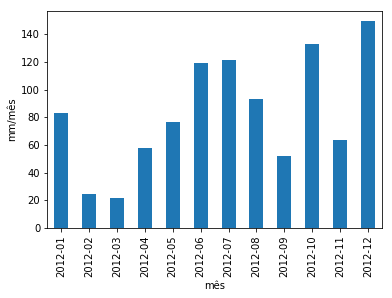

In [24]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)
rain.RH[rain.RH < 0] = 0  # remover os valores negativos
rain.RH = rain.RH * 0.1 # converter em mm/dia
monthlyrain = rain.RH.resample('M', kind='period').sum()
display(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/mês')
plt.xlabel('mês');

### <a name="back5"></a> Exercício 5. Repetir a amostragem de dados meteorológicos
O ficheiro `rotterdam_weather_2000_2010.txt` contém dados meteorológicos diários de Roterdão para o período 2000-2010 (novamente provindos do KNMI). Abra o ficheiro de dados num editor para ver os conteúdos. Efetue as seguintes tarefas:

* Carregue os dados, certificando-se de que as datas são usadas como índices. 
* Converta a chuva e a evaporação em mm/dia e a temperatura em graus Celcius.
* Defina uma qualquer precipitação negativa (explicado no ficheiro) para zero.
* Calcule a precipitação anual total, a evaporação anual total e a temperatura média anual.
* Crie um gráfico de linhas para a precipitação anual, a evaporação anual e a temperatura média através da função `plot` do pacote `pandas`. Represente graficamente a temperatura média no eixo $y$ secundário (use a ajuda da função para saber como).

<a href="#ex5answer">Soluções do Exercício 5</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

In [25]:
from pandas import read_csv
rain = read_csv('annual_precip.csv', skiprows=2, index_col=0)
#
print('Primeiras cinco linhas do conjunto de dados:')
print(rain.head())
#
print()
print('Precipitação média anual para o Panamá é de:',rain.loc['Panama','precip'],'mm/ano')
#
print()
print('Superfície terrestre total dos Países Baixos é de', rain.loc['Netherlands','area'], 'milhares km^2')
#
print()
print('Países com uma precipitação média anual inferior a 200 mm/ano')
print(rain[ rain.precip < 200 ])
#
print()
print('Países com uma precipitação média anual superior a 2500 mm/ano')
print(rain[ rain.precip > 2500 ])
#
print()
print('Países cuja precipitação média anual é semelhantes à dos Países Baixos')
print(rain[abs(rain.loc['Netherlands','precip'] - rain.precip) < 50])

Primeiras cinco linhas do conjunto de dados:
                precip    area
country                       
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5

Precipitação média anual para o Panamá é de: 2692.0 mm/ano

Superfície terrestre total dos Países Baixos é de 33.7 milhares km^2

Países com uma precipitação média anual inferior a 200 mm/ano
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

Cinco países com o maior fluxo de entrada de água doce anual:
                    precip     area      totalq
country                                        
Brazil              1782.0   8459.4  15074.6508
Russian Federation   460.0  16376.9   7533.3740
United States        715.0   9147.4   6540.3910
China                645.0   9327.5   6016.2375
Indonesia           2702.0   1811.6   4894.9432


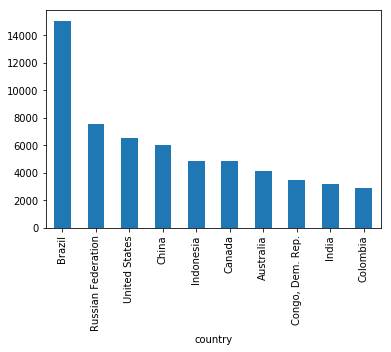

In [26]:
rain['totalq'] = rain.precip * rain.area * 1e-3
#
print('Cinco países com o maior fluxo de entrada de água doce anual:')
rain.sort_values(by='totalq', ascending=False, inplace=True)
print(rain[:5])
#
rain.totalq[:10].plot(kind='bar');

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

Precipitação diária máxima 22.4
Data da precipitação diária máxima 2012-12-22 00:00:00


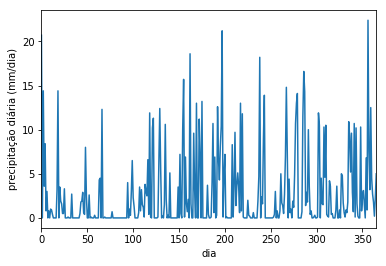

In [27]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], skipinitialspace=True)
# convert to mm/d
rain.iloc[:,2] = rain.iloc[:,2] * 0.1
# set negative values to zero
rain.loc[rain.RH < 0, 'RH'] = 0
rain.RH.plot()
plt.xlabel('dia')
plt.ylabel('precipitação diária (mm/dia)')
plt.xlim(0, 365)
print('Precipitação diária máxima', rain.RH.max())
print('Data da precipitação diária máxima', rain.YYYYMMDD[rain.RH.argmax()])

<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

[  83.    24.3   21.9   57.6   76.5  119.   121.6   93.4   52.   132.6
   63.3  149.5]


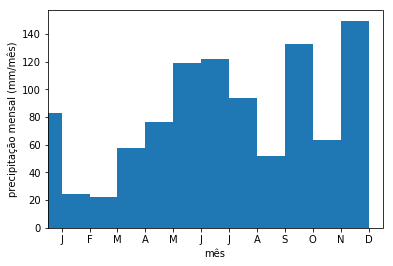

In [28]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month - 1] += rain.iloc[i, 2]
print(monthlyrain)
#
plt.bar(np.arange(12), monthlyrain, width=1)
plt.xlabel('mês')
plt.ylabel('precipitação mensal (mm/mês)')
plt.xticks(np.arange(12) + 0.5, ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.xlim(0, 12);

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

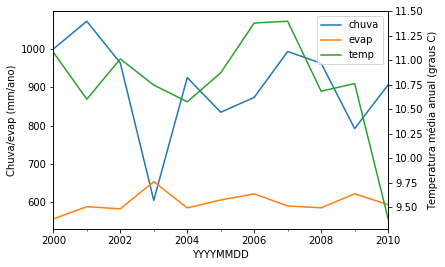

In [29]:
weather = read_csv('rotterdam_weather_2000_2010.txt', skiprows=11,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD', skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.loc[weather.RH < 0, 'RH'] = 0
yearly_rain = weather.RH.resample('A', kind='period').sum()
yearly_evap = weather.EV24.resample('A', kind='period').sum()
yearly_temp = weather.TG.resample('A', kind='period').mean()
ax1 = yearly_rain.plot()
ax1 = yearly_evap.plot()
plt.ylabel('Chuva/evap (mm/ano)')
ax2 = yearly_temp.plot(secondary_y=True)
plt.xlabel('Ano')
plt.ylabel('Temperatura média anual (graus C)')
plt.legend(ax1.get_lines() + ax2.get_lines(),
           ['chuva', 'evap', 'temp'], loc='best');

<a href="#back5">Voltar ao Exercício 5</a>

A obra "Notebook 8: Noções básicas de Pandas para análise de dados" é um derivado de [Notebook 8: Basics of Pandas for data analysis](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook8_pandas/py_exploratory_comp_8_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt).
"Notebook 8: Noções básicas de Pandas para análise de dados" é publicado sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt) por Educa2030.